#  **Pendahuluan**
---

##  Latar Belakang

Tuberkulosis (TBC) masih menjadi tantangan besar bagi kesehatan masyarakat global, terutama di negara-negara dengan beban kasus tinggi. Indonesia menempati urutan kedua dengan jumlah kasus TBC terbanyak di dunia setelah India, menurut laporan WHO. 

Meskipun pemerintah telah menjalankan berbagai program penanggulangan, angka kejadian dan kematian akibat TBC masih menunjukkan angka yang signifikan.

Untuk mengevaluasi efektivitas dari upaya penanggulangan tersebut, analisis berbasis data sangat diperlukan. Dengan memanfaatkan dataset global yang dirilis oleh World Health Organization (WHO), analisis ini berfokus pada tren kasus TBC di Indonesia selama periode 2000–2023. Dataset ini mencakup indikator penting seperti jumlah insiden, tingkat kematian, koinfeksi HIV-TB, serta cakupan deteksi kasus (Case Detection Rate/CDR).

Melalui analisis ini, diharapkan dapat diperoleh wawasan berbasis data terkait perkembangan epidemi TBC di Indonesia yang berguna bagi pemerintah, akademisi, dan masyarakat dalam mendukung strategi eliminasi TBC nasional menuju tahun 2030.

---

##  Problem Statement

Meskipun Indonesia telah menjalankan berbagai program nasional dalam pengendalian Tuberkulosis, tren kasus dan kematian akibat TBC masih tetap tinggi. Diperlukan pemantauan dan analisis berbasis data untuk mengetahui apakah tren tersebut menunjukkan perbaikan dari waktu ke waktu.

Dataset global WHO menyediakan data historis yang dapat dimanfaatkan untuk mengevaluasi perkembangan epidemi TBC secara lebih mendalam. Namun, data tersebut belum banyak dimanfaatkan secara komprehensif untuk menganalisis kondisi TBC di Indonesia berdasarkan indikator utama seperti insiden, kematian, dan deteksi kasus.

---

##  Rumusan Masalah

Berdasarkan latar belakang dan pernyataan masalah di atas, maka rumusan masalah dalam analisis ini adalah:

1. Bagaimana tren perkembangan kasus Tuberkulosis (TBC) di Indonesia dari tahun 2010 hingga 2023 berdasarkan data WHO?
2. Bagaimana tren kematian akibat TBC, termasuk kematian akibat koinfeksi HIV-TB, selama periode tersebut?
3. Bagaimana perubahan Case Detection Rate (CDR) TBC di Indonesia dari tahun ke tahun?
4. Apa saja temuan penting dari data tersebut yang dapat mendukung pengambilan kebijakan untuk eliminasi TBC di Indonesia?

---

##  Deskripsi Kolom Dataset WHO TB Burden

Dataset yang digunakan adalah **WHO Global Tuberculosis Report** yang dapat diunduh melalui tautan resmi berikut:

🔗 [WHO TB Burden Dataset](https://www.who.int/teams/global-programme-on-tuberculosis-and-lung-health/data?utm_source=chatgpt.com)

---

###  Informasi Umum

| Kolom     | Deskripsi                                |
|-----------|-------------------------------------------|
| `country` | Nama negara                               |
| `year`    | Tahun pelaporan                           |

---

###  Estimasi Insiden TBC

| Kolom         | Deskripsi                                               |
|---------------|----------------------------------------------------------|
| `e_inc_100k`  | Estimasi jumlah kasus TB per 100.000 penduduk           |
| `e_inc_num`   | Jumlah estimasi kasus TB secara absolut                 |

---

###  Koinfeksi TB-HIV

| Kolom               | Deskripsi                                              |
|---------------------|---------------------------------------------------------|
| `e_tbhiv_prct`      | Persentase estimasi kasus TB yang juga HIV-positif      |
| `e_inc_tbhiv_100k`  | Insiden TB-HIV per 100.000 penduduk                     |

---

###  Kematian Akibat TBC

| Kolom                   | Deskripsi                                             |
|-------------------------|--------------------------------------------------------|
| `e_mort_exc_tbhiv_100k` | Kematian akibat TB (non-HIV) per 100.000 penduduk     |
| `e_mort_exc_tbhiv_num`  | Jumlah kematian TB non-HIV                            |

---

###  Case Fatality Rate (CFR)

| Kolom   | Deskripsi                                                    |
|---------|---------------------------------------------------------------|
| `cfr`   | Proporsi kematian per kasus TB (misal 0.25 berarti 25%)       |

---

# **Data Preparation**
---

Pada tahapan ini, kita akan melakukan persiapan data sebelum masuk ke tahap analisis. Mengingat fokus analisis ini adalah tren Tuberkulosis (TB) di Indonesia dan negara-negara ASEAN, maka langkah pertama yang dilakukan adalah:

- Melakukan **slicing/filtering** data agar hanya mencakup negara ASEAN
- Menentukan periode waktu analisis (2000–2023)
- Memilih indikator penting untuk dianalisis
- Melakukan **pengecekan missing value**
- Melakukan **pengecekan duplikasi data**
    '


In [46]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [47]:
WHO = pd.read_csv("d:\\Analisis TB\\TB_burden_countries_2025-07-14.csv")


## Pemilihan Indikator Atau Kolom Untuk Di Gunakan

In [48]:
columns = [
    'country', 'year', 'e_inc_100k', 'e_inc_num',
    'e_mort_num', 'e_mort_100k',
    'e_inc_tbhiv_num', 'e_inc_tbhiv_100k', 'cfr'
]

df_raw = WHO[columns].copy()

In [49]:
asean_countries = [
    "Indonesia", "Malaysia", "Philippines", "Thailand", "Vietnam",
    "Singapore", "Brunei Darussalam", "Cambodia", 
    "Lao People's Democratic Republic", "Myanmar"
]

df = df_raw[df_raw['country'].isin(asean_countries)][columns].copy()

display(df.info(),df.head(25))

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 696 to 4518
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           216 non-null    object 
 1   year              216 non-null    int64  
 2   e_inc_100k        216 non-null    float64
 3   e_inc_num         216 non-null    int64  
 4   e_mort_num        216 non-null    float64
 5   e_mort_100k       216 non-null    float64
 6   e_inc_tbhiv_num   216 non-null    float64
 7   e_inc_tbhiv_100k  216 non-null    float64
 8   cfr               216 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 16.9+ KB


None

,country,year,e_inc_100k,e_inc_num,e_mort_num,e_mort_100k,e_inc_tbhiv_num,e_inc_tbhiv_100k,cfr
696,Brunei Darussalam,2000,108.0,350,19.0,5.7,0.0,0.06,0.05
697,Brunei Darussalam,2001,75.0,250,16.0,4.8,0.0,0.12,0.07
698,Brunei Darussalam,2002,78.0,260,12.0,3.6,1.0,0.20,0.05
699,Brunei Darussalam,2003,69.0,240,11.0,3.3,1.0,0.22,0.05
700,Brunei Darussalam,2004,60.0,210,16.0,4.4,1.0,0.31,0.07
701,Brunei Darussalam,2005,52.0,190,15.0,4.2,2.0,0.63,0.08
702,Brunei Darussalam,2006,64.0,230,10.0,2.8,1.0,0.26,0.04
703,Brunei Darussalam,2007,65.0,240,11.0,2.9,0.0,0.00,0.05
704,Brunei Darussalam,2008,68.0,260,11.0,2.8,0.0,0.00,0.04
705,Brunei Darussalam,2009,64.0,240,12.0,3.1,2.0,0.60,0.05


In [50]:
listData= []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Description', 'Number of Unique Value', 'Unique Value Description'],
                     data=listData)
tabelDesc

,Column Description,Number of Unique Value,Unique Value Description
0,country,9,"[Brunei Darussalam, Cambodia, Indonesia, Lao P..."
1,year,24,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200..."
2,e_inc_100k,165,"[108.0, 75.0, 78.0, 69.0, 60.0, 52.0, 64.0, 65..."
3,e_inc_num,144,"[350, 250, 260, 240, 210, 190, 230, 270, 280, ..."
4,e_mort_num,129,"[19.0, 16.0, 12.0, 11.0, 15.0, 10.0, 13.0, 6.0..."
5,e_mort_100k,127,"[5.7, 4.8, 3.6, 3.3, 4.4, 4.2, 2.8, 2.9, 3.1, ..."
6,e_inc_tbhiv_num,121,"[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 5.0, 7.0, 8200...."
7,e_inc_tbhiv_100k,133,"[0.06, 0.12, 0.2, 0.22, 0.31, 0.63, 0.26, 0.0,..."
8,cfr,41,"[0.05, 0.07, 0.08, 0.04, 0.03, 0.06, 0.1, 0.09..."


## Pengecekan Missing Value 

In [51]:
df.isna().sum()

country             0
year                0
e_inc_100k          0
e_inc_num           0
e_mort_num          0
e_mort_100k         0
e_inc_tbhiv_num     0
e_inc_tbhiv_100k    0
cfr                 0
dtype: int64

In [52]:
df.isna().sum()/df.shape[0]*100

country             0.0
year                0.0
e_inc_100k          0.0
e_inc_num           0.0
e_mort_num          0.0
e_mort_100k         0.0
e_inc_tbhiv_num     0.0
e_inc_tbhiv_100k    0.0
cfr                 0.0
dtype: float64

## Pengecekan Data Duplicate

In [53]:
df.duplicated().sum()

0

# **Data Analisis TB ASEAN**
---

Setelah melakukan tahap persiapan data, pada bagian ini kita akan melakukan analisis eksploratif terhadap tren Tuberkulosis (TBC) di kawasan Asia Tenggara (ASEAN) berdasarkan data dari WHO untuk periode tahun 2000 hingga 2023.

Fokus analisis ini mencakup:

- Tren estimasi kasus TBC per 100.000 penduduk (`e_inc_100k`)
- Tren jumlah absolut kasus TBC (`e_inc_num`)
- Tren kematian akibat TBC non-HIV (`e_mort_exc_tbhiv_100k` dan `e_mort_exc_tbhiv_num`)
- Koinfeksi HIV-TB
- Rasio kematian per kasus (CFR)

In [68]:
df.describe()

,year,e_inc_100k,e_inc_num,e_mort_num,e_mort_100k,e_inc_tbhiv_num,e_inc_tbhiv_100k,cfr
count,216.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2011.500000,264.921296,2.078514e+05,25724.328704,36.609815,8372.111111,15.073981,0.133287
std,6.938266,185.450246,2.879203e+05,37248.585920,37.391558,10969.055320,19.079564,0.097598
min,2000.000000,34.000000,1.900000e+02,6.000000,0.580000,0.000000,0.000000,0.010000
25%,2005.750000,75.000000,1.200000e+04,1800.000000,5.975000,330.000000,2.350000,0.070000
50%,2011.500000,240.000000,6.250000e+04,5900.000000,28.000000,1950.000000,7.650000,0.100000
75%,2017.250000,401.250000,2.562500e+05,32250.000000,51.000000,15000.000000,17.250000,0.150000
max,2023.000000,643.000000,1.090000e+06,144000.000000,194.000000,56000.000000,88.000000,0.440000


##  **1. Tren Estimasi Kasus TBC per 100.000 Penduduk**

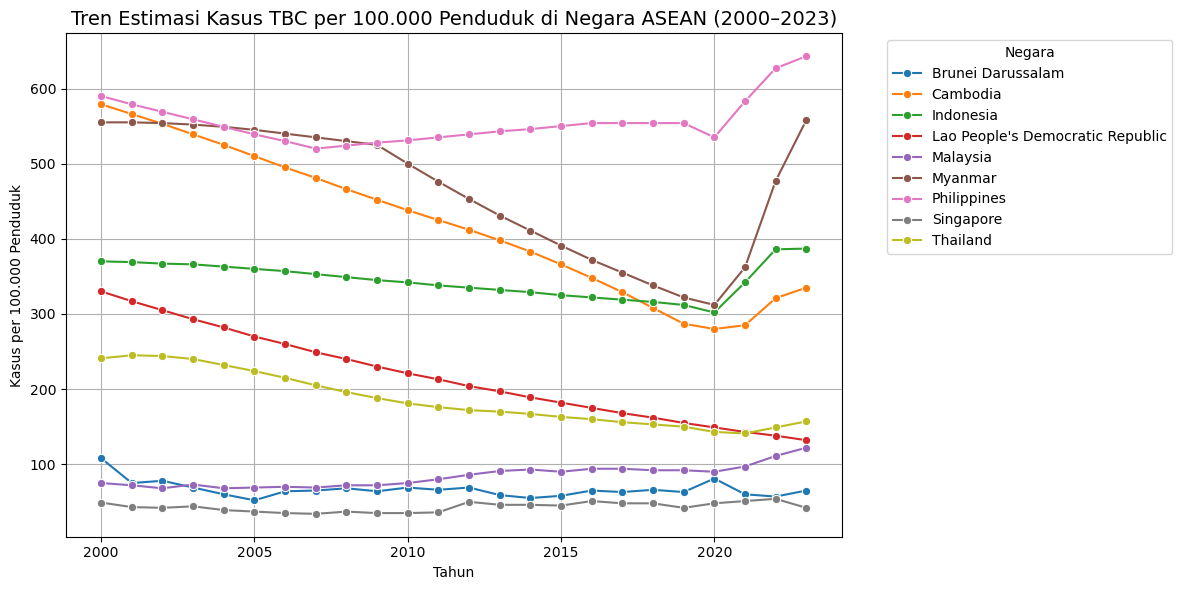

In [62]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='e_inc_100k', hue='country', marker='o')
plt.title('Tren Estimasi Kasus TBC per 100.000 Penduduk di Negara ASEAN (2000–2023)', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Kasus per 100.000 Penduduk')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight 

#### 1. Filipina dan Myanmar: Beban Tertinggi dan Lonjakan Pasca 2020
- Kedua negara konsisten mencatat **insiden TBC tertinggi** di kawasan ASEAN.
- **Filipina:** meningkat dari 540 (2019) menjadi **~640 per 100.000 penduduk** pada 2023.
- **Myanmar:** mengalami kenaikan dari ~310 ke **560 per 100.000** antara 2020–2023.
- Lonjakan ini kemungkinan besar disebabkan oleh **gangguan layanan kesehatan akibat pandemi**, backlog diagnosis, atau peningkatan pelaporan.

#### 2. Thailand dan Laos: Penurunan Signifikan dan Konsisten
- **Thailand:** turun dari ~240 ke **~160 per 100.000** (2000–2023).
- **Laos:** menunjukkan tren penurunan dari ~330 ke **~130 per 100.000**.
- Penurunan konsisten ini mencerminkan **keberhasilan program pengendalian TBC** jangka panjang.

#### 3. Singapura: Insiden Tertendah dan Stabil
- Menjadi satu-satunya negara dengan **angka stabil dan rendah**, konsisten di bawah **60 per 100.000** sepanjang periode.
- Hal ini menandakan efektivitas sistem kesehatan dan pengendalian penyakit yang baik.

#### 4. Indonesia: Tren Menurun, Namun Masih Tinggi
- Indonesia mengalami penurunan bertahap dari ~370 (2000) ke **~390 per 100.000** (2023), dengan sedikit lonjakan di 2021–2022.
- Meski menurun, angka tetap tergolong tinggi dan memerlukan **penguatan sistem deteksi dini dan pengobatan**

##  **2. Tren Kematian Akibat TBC (Non-HIV)**

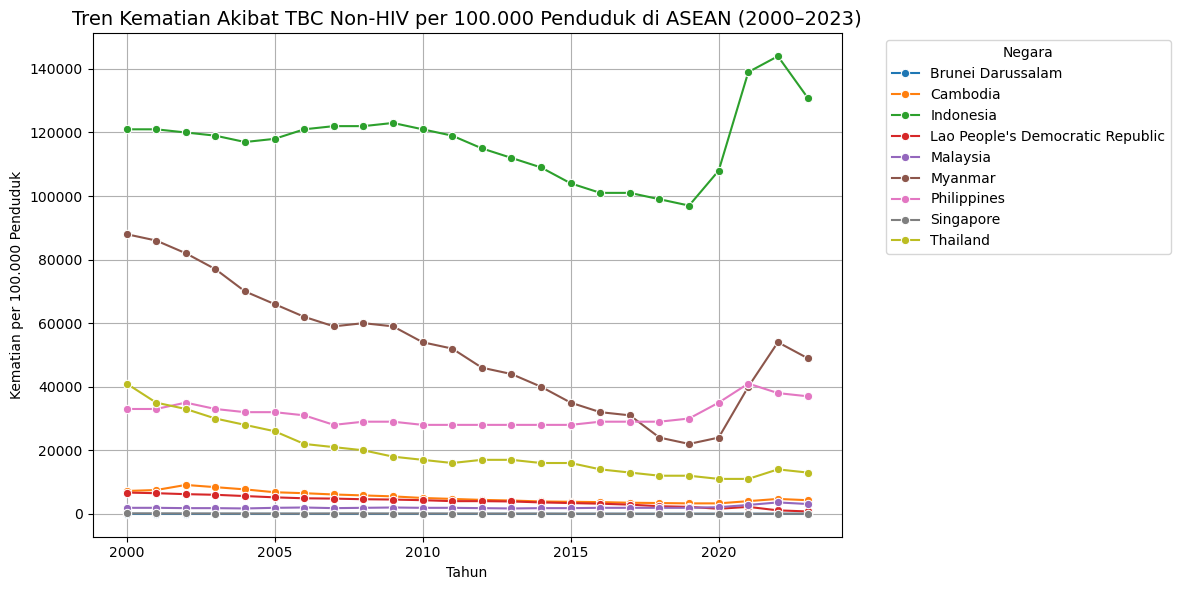

In [63]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='e_mort_num', hue='country', marker='o')
plt.title('Tren Kematian Akibat TBC Non-HIV per 100.000 Penduduk di ASEAN (2000–2023)', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Kematian per 100.000 Penduduk')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight Utama

#### 1.  Indonesia: Tingkat Kematian Tertinggi dan Lonjakan Pasca 2020
- Indonesia mencatat angka **kematian tertinggi di ASEAN** sepanjang periode (>100.000 per 100.000 penduduk).
- Terdapat lonjakan mencolok pada **2020–2022**, dari ~98.000 menjadi **>140.000 kematian per 100.000**.

#### 2. Myanmar dan 🇵🇭 Filipina: Tren Fluktuatif dan Kematian Relatif Tinggi
- **Myanmar:** Sempat mengalami penurunan kematian (2000–2019), namun kembali naik ke **~55.000 per 100.000** pada 2022.
- **Filipina:** Kematian menurun hingga 2015, tetapi meningkat sejak 2020 mencapai **~40.000 per 100.000** pada 2022.
- Kedua negara menunjukkan **kerentanan terhadap gangguan layanan kesehatan** dalam beberapa tahun terakhir.

#### 3. Thailand dan  Laos: Penurunan Konsisten
- **Thailand:** Turun dari ~40.000 menjadi **~13.000 per 100.000** antara 2000–2023.
- **Laos:** Konsisten berada di bawah 10.000 dan terus menurun.

#### 4.  Singapura &  Brunei: Kematian Terendah dan Stabil
- Kedua negara menunjukkan angka kematian yang sangat rendah dan stabil (<1.000 per 100.000).
- Menunjukkan keberhasilan dalam pengendalian penyakit dan akses layanan kesehatan universal.

##  **3. Analisis Koinfeksi TB-HIV**

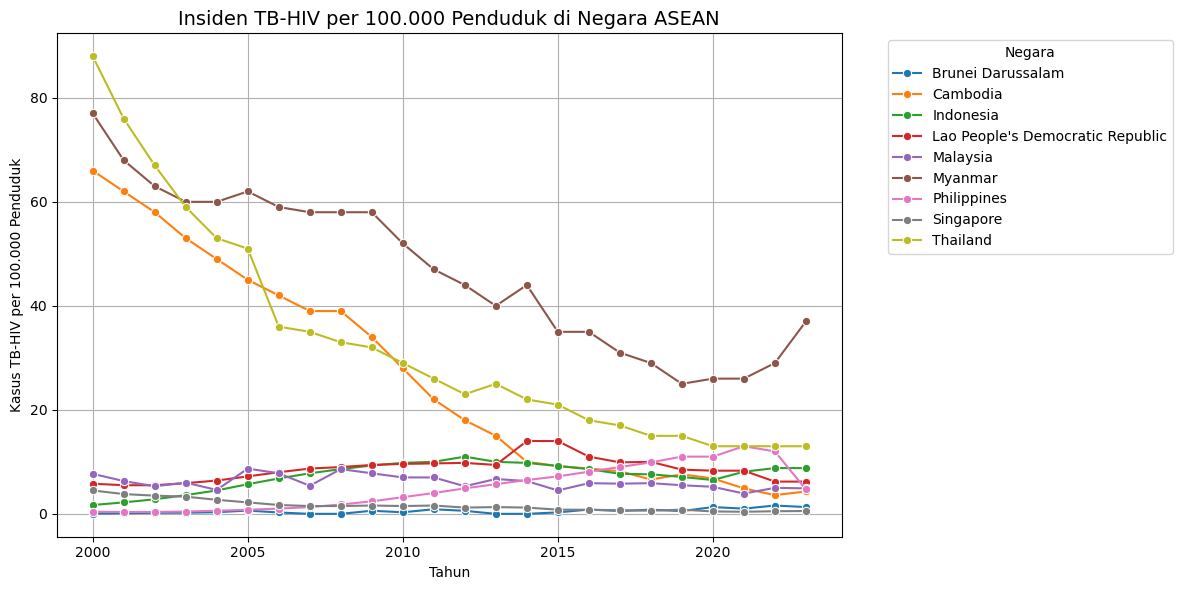

In [66]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='e_inc_tbhiv_100k', hue='country', marker='o')
plt.title('Insiden TB-HIV per 100.000 Penduduk di Negara ASEAN', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Kasus TB-HIV per 100.000 Penduduk')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight 

#### 1. Thailand &  Myanmar: Dominasi Kasus TB-HIV
- **Thailand** mencatat insiden tertinggi pada awal periode (~88/100.000 di tahun 2000) namun menunjukkan **penurunan tajam** hingga ~13 pada 2023.
- **Myanmar** juga memulai dengan angka tinggi (~77/100.000) dan terus menurun, namun mengalami **kenaikan kembali pada 2023 (~37/100.000)**.

### 2. Kamboja: Penurunan Konsisten
- Dari angka tinggi pada awal tahun (~67/100.000), Kamboja berhasil menurunkan insiden secara konsisten hingga **di bawah 5/100.000** pada 2023.

### 3. Indonesia, Laos, Malaysia, Filipina: Kategori Menengah
- Indonesia dan Laos menunjukkan peningkatan insiden TB-HIV hingga 2015, kemudian mulai menurun.
- Filipina mengalami kenaikan perlahan namun stabil hingga tahun 2020-an.
- Malaysia menunjukkan tren **stabil** sejak awal dengan fluktuasi ringan di kisaran **4–9/100.000**.

### 4. Brunei, Singapura: Insiden Sangat Rendah
- Konsisten berada **di bawah 1/100.000**, menunjukkan sistem deteksi dini dan pengendalian HIV-TB yang sangat baik.

##  **4. Case Fatality Rate (CFR) di Negara ASEAN**

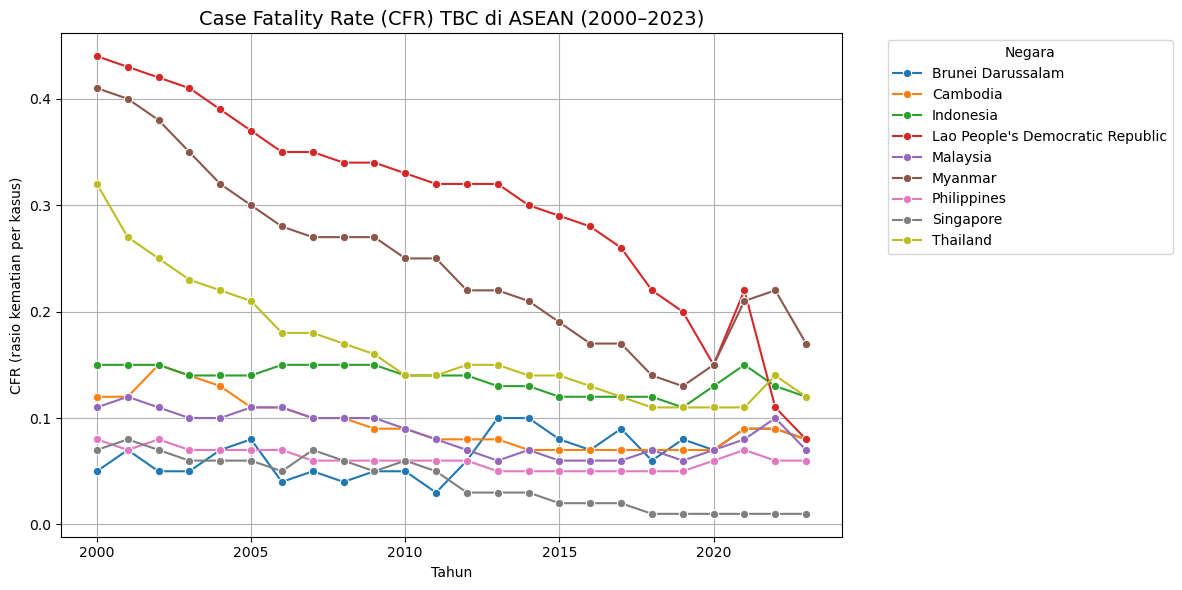

In [67]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='year', y='cfr', hue='country', marker='o')
plt.title('Case Fatality Rate (CFR) TBC di ASEAN (2000–2023)', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('CFR (rasio kematian per kasus)')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight Utama

#### 1. Laos dan Myanmar: CFR Tertinggi
- **Laos** memulai dengan CFR tertinggi (~0,44) pada tahun 2000, namun **menurun stabil** hingga ~0,08 pada 2023.
- **Myanmar** juga menunjukkan penurunan dari ~0,41 ke ~0,17 pada 2023, meskipun sempat naik kembali di tahun 2021.

### 2. Thailand: Penurunan Signifikan
- Dari ~0,32 pada tahun 2000, Thailand menurunkan CFR menjadi ~0,12, mengindikasikan **peningkatan layanan diagnosis dan pengobatan**.

### 3. Indonesia: Relatif Stabil
- Indonesia mencatat CFR sekitar **0,14–0,15** secara konsisten, dengan sedikit fluktuasi, mencerminkan **perluasan deteksi kasus namun masih ada gap dalam pengobatan tuntas**.

### 4. Brunei, Singapura, Malaysia: CFR Terendah
- **Singapura** dan **Brunei** memiliki CFR < 0.05 hampir sepanjang periode, mencerminkan **akses layanan kesehatan dan pengobatan TBC yang sangat baik**.
- Malaysia stabil pada kisaran **0,08–0,1**, relatif baik dibanding negara lain.

## Penutup  
###  Kesimpulan Utama

- **Mayoritas negara ASEAN menunjukkan penurunan CFR TBC** dari tahun 2000 hingga 2023, mencerminkan peningkatan efektivitas dalam diagnosis dini, pengobatan, dan manajemen kasus TBC.
- **Laos dan Myanmar** masih mencatat **tingkat CFR yang tinggi**, mengindikasikan perlunya peningkatan dalam sistem rujukan, kepatuhan pengobatan, dan akses layanan kesehatan.
- **Brunei Darussalam dan Singapura** berhasil mempertahankan **CFR terendah di kawasan**, menunjukkan praktik terbaik dalam pengelolaan kasus TBC dan sistem kesehatan yang tangguh.

---

### 🛠️ Rekomendasi Aksi

#### 1. Untuk Negara dengan CFR Tinggi (Laos, Myanmar):
- **Perkuat sistem rujukan dan pemantauan kasus**
  - Bangun sistem pelacakan aktif dan fasilitas rujukan cepat, khususnya di daerah terpencil.
- **Tingkatkan akses dan kepatuhan terhadap pengobatan**
  - Pastikan ketersediaan obat, program dukungan pasien, dan pemantauan pengobatan jangka panjang.
- **Kapasitasi tenaga kesehatan primer**
  - Latih petugas kesehatan di tingkat desa dan klinik untuk diagnosis cepat dan pengawasan terapi TBC.

#### 2. Untuk Negara dengan CFR Rendah (Brunei, Singapura):
- **Pertahankan sistem surveilans berkualitas tinggi**
  - Lanjutkan sistem pelaporan real-time dan evaluasi kualitas layanan.
- **Jadi pusat rujukan & kolaborasi regional**
  - Berkontribusi dalam pelatihan, transfer teknologi, dan pengembangan protokol regional pengendalian TBC.

#### 3. Untuk Semua Negara ASEAN:
- **Kolaborasi regional eliminasi TBC**
  - Tingkatkan integrasi lintas sektor (HIV, gizi, kesehatan ibu-anak) dan koordinasi dalam ASEAN untuk eliminasi TBC tahun 2030.
- **Investasi teknologi diagnostik & digitalisasi layanan**
  - Gunakan digital health tools untuk skrining, pelaporan kasus, edukasi masyarakat, dan pemantauan pengobatan.

---

*Catatan: Indonesia perlu memperhatikan tren kenaikan pada tahun-tahun terakhir di beberapa indikator TBC. Intervensi berbasis data sangat dibutuhkan untuk menjaga tren tetap menurun.*